# The dragon Curve

[The Dragon Curve](https://en.wikipedia.org/wiki/Dragon_curve) is a curve formed by repeatedly replacing each line sigment by two line segments with a right angle and a rotation of 45 degrees

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
def generate_dragon_curve(order):
    # L-system rules
    axiom = "FX"
    rules = {
        "X": "X+YF+",
        "Y": "-FX-Y"
    }

    sequence = axiom
    for _ in range(order):
        sequence = "".join(rules.get(ch, ch) for ch in sequence)

    return sequence

In [5]:
def dragon_curve_coordinates(seq, step_size=1.0, device="cpu"):
    # Directions: 0=right, 90=up, 180=left, 270=down (angle mod 360)
    angle = 0
    pos = torch.tensor([0.0, 0.0], device=device)
    positions = [pos.clone()]
    
    for c in seq:
        if c == "F":
            rad = torch.deg2rad(torch.tensor(angle, dtype=torch.float32))
            delta = step_size * torch.tensor([torch.cos(rad), torch.sin(rad)], device=device)
            pos = pos + delta
            positions.append(pos.clone())
        elif c == "+":
            angle -= 90
        elif c == "-":
            angle += 90

    return torch.stack(positions)

In [8]:
def draw_dragon_curve(order=15, step_size=1.0):
    seq = generate_dragon_curve(order)
    coords = dragon_curve_coordinates(seq, step_size=step_size, device=device)
    
    x = coords[:, 0].cpu().numpy()
    y = coords[:, 1].cpu().numpy()

    plt.figure(figsize=(10, 10))
    plt.plot(x, y, color='green', linewidth=0.5)
    plt.axis("equal")
    plt.axis("off")
    plt.title(f"Dragon Curve (Order {order})")
    plt.show()

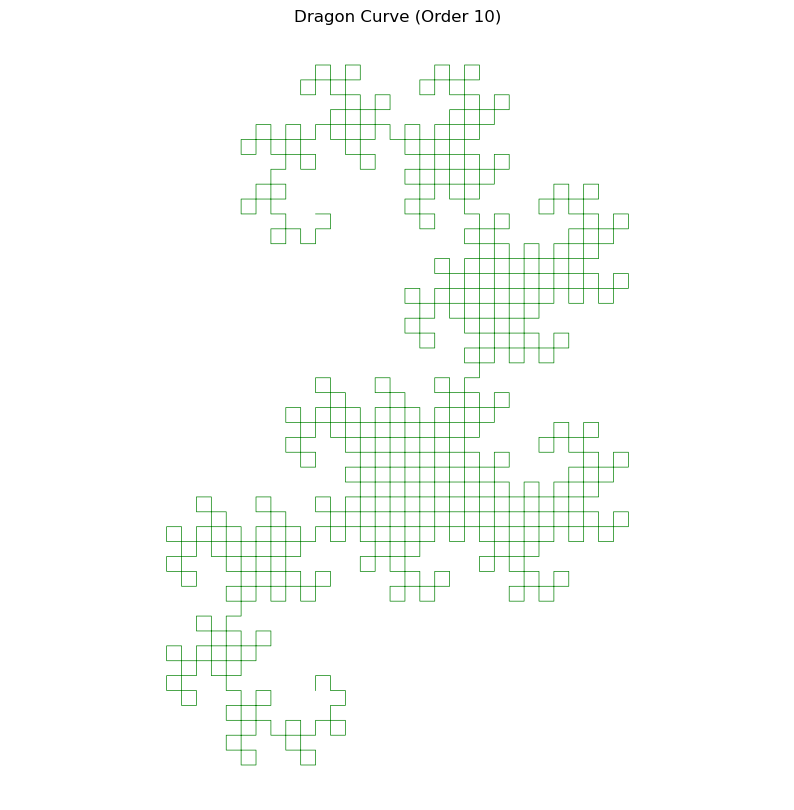

In [9]:
draw_dragon_curve(order=10, step_size=1.0)

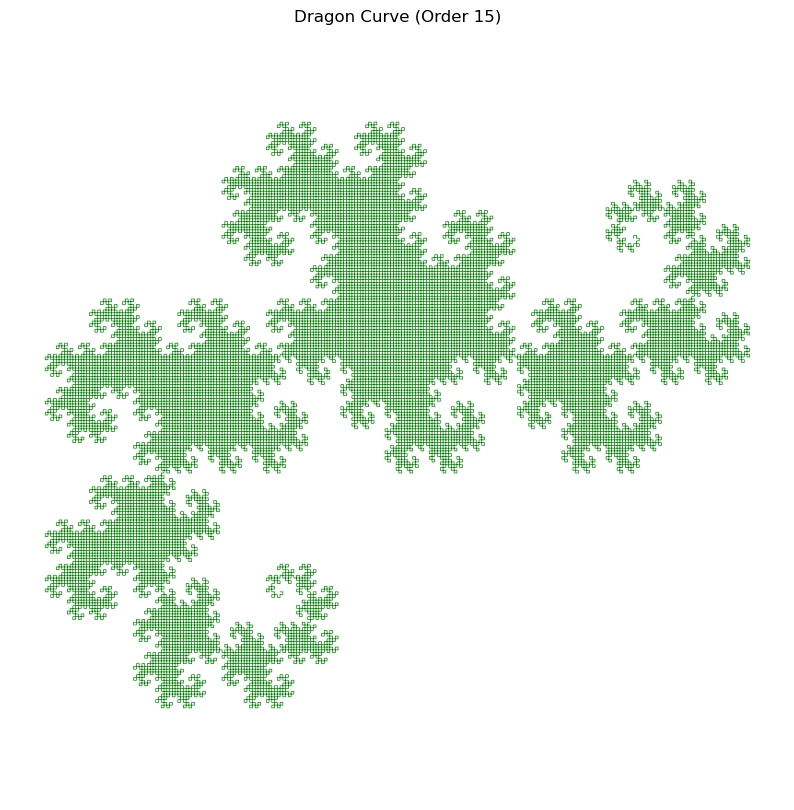

In [11]:
draw_dragon_curve(order=15, step_size=1.0)

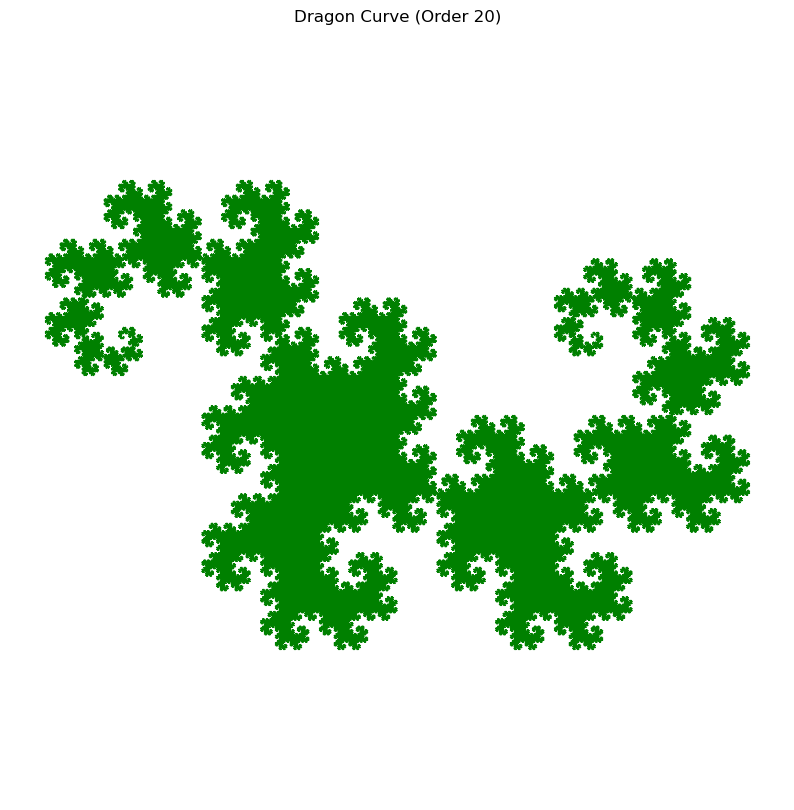

In [12]:
draw_dragon_curve(order=20, step_size=1.0)